In [ ]:
%pip install plotly
%pip install nbformat

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

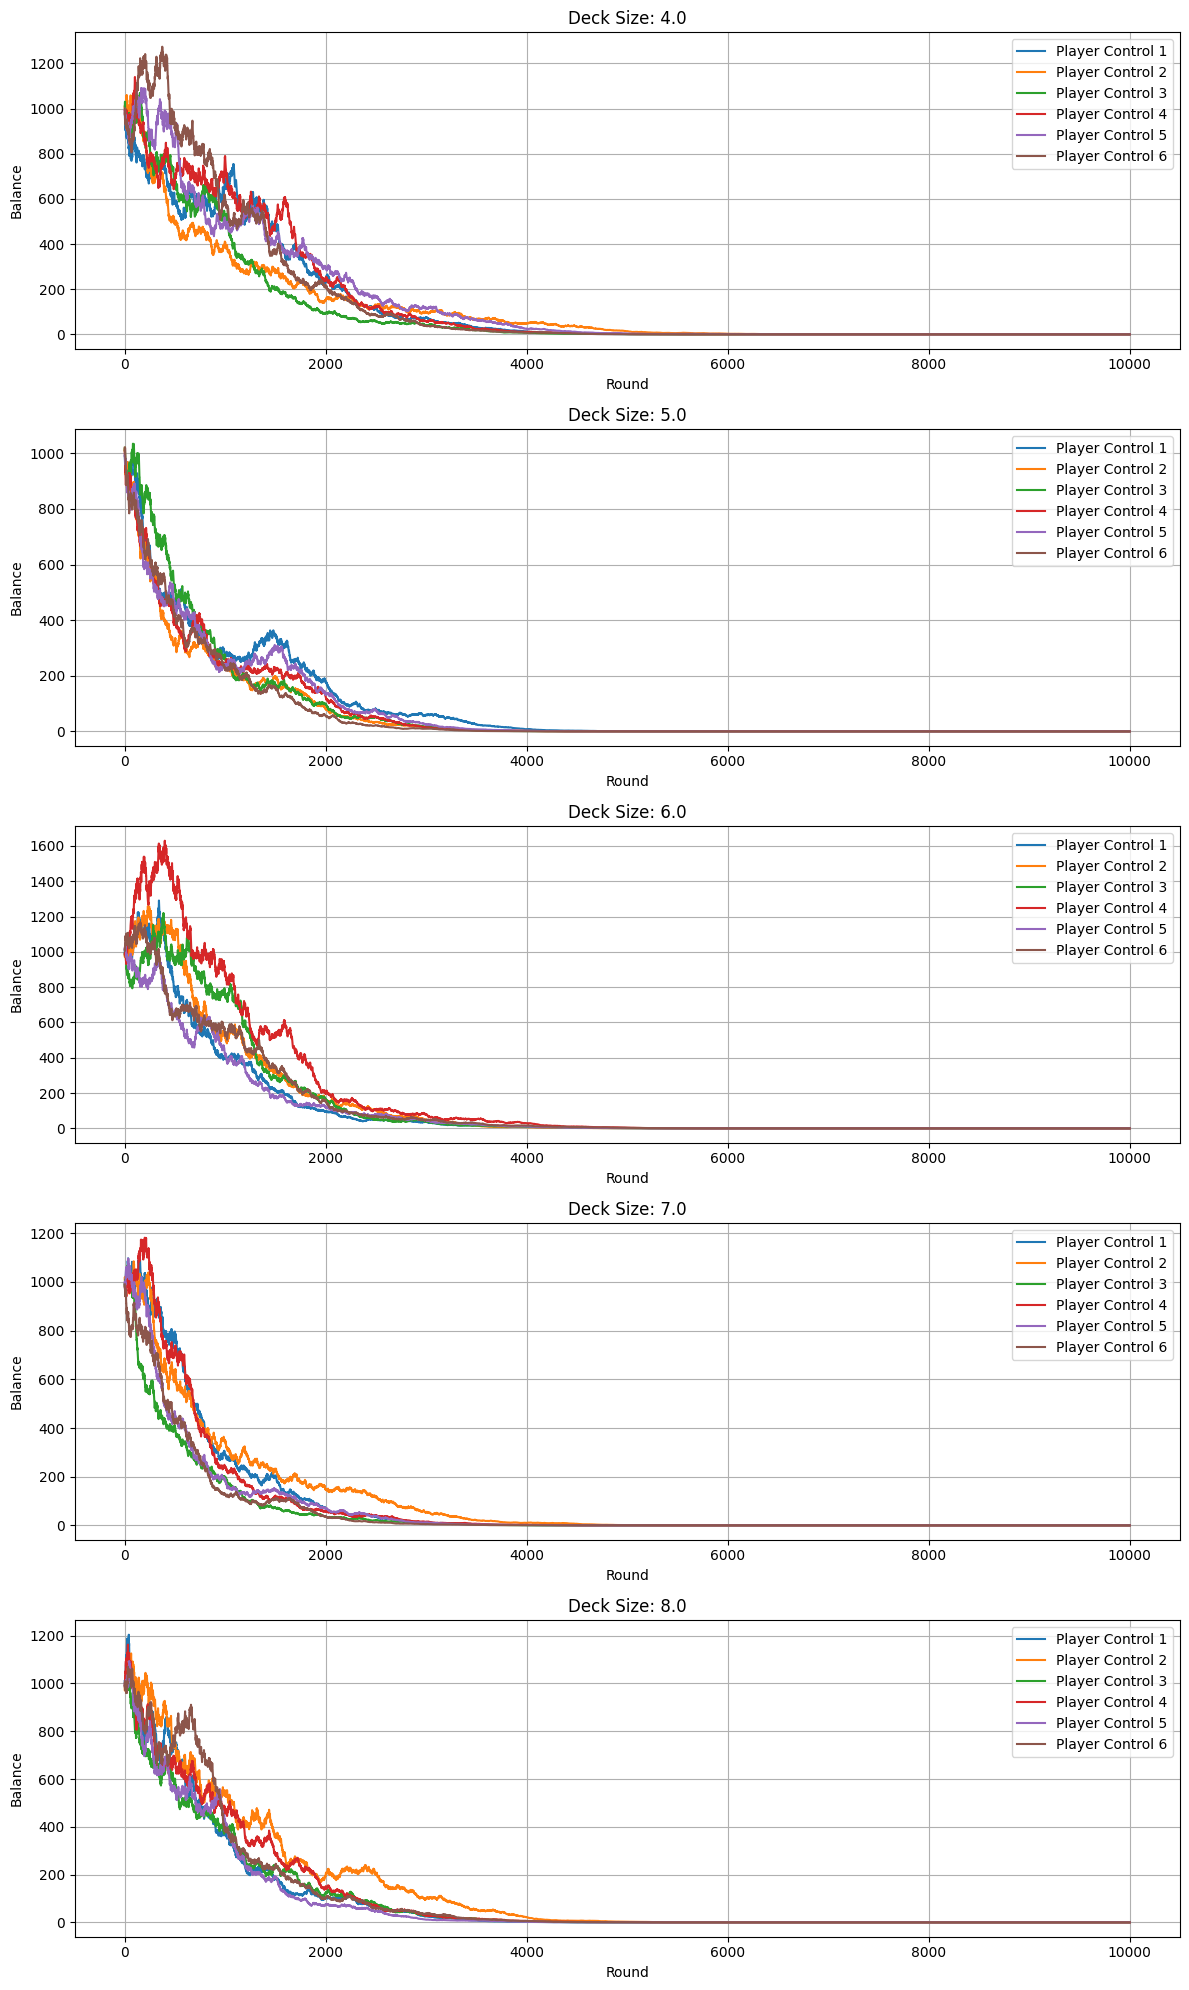

In [ ]:
"""#Control group - six players with control strategy over 10,000 rounds"""
results = pd.read_csv("Control_BaseStratOnly.csv")

# Group the data by deck size and player
grouped_results = results.groupby(['name', 'decks'])

# Create a figure with subplots for each deck size
unique_deck_sizes = results['decks'].unique()
fig, axes = plt.subplots(len(unique_deck_sizes), 1, figsize=(12, 4*len(unique_deck_sizes)))

# Plot balance over rounds for each deck size
for idx, deck_size in enumerate(unique_deck_sizes):
    deck_data = results[results['decks'] == deck_size]
    
    # Plot each player's balance
    for player in deck_data['name'].unique():
        player_data = deck_data[deck_data['name'] == player]
        axes[idx].plot(player_data['round'], player_data['balance'], label=f'Player {player}')
    
    axes[idx].set_title(f'Deck Size: {deck_size}')
    axes[idx].set_xlabel('Round')
    axes[idx].set_ylabel('Balance')
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

""" NOTES """
"""
Unfavorable over time- makes sense bc of
Law of large numbers
- As the number of rounds increases, the average outcome will converge to the expected value.
since the delaer has a slight advantage, the player's balance will tend to decrease over time.
- The longer the game is played, the more pronounced this effect becomes.

Deck size seems to be irrevalant
No matter if its 4 or 8 decks, they all follow the same trend
Current strategy only looks the hand, and nothing else

however, who is really gonna play 5,000 rounds of blackjack in one sitting?

Absolute max amount of time a person would play blackjack is 5 hours.
Assuming 1 hand per 30 seconds, that is 600 hands.
"""

     round  wins  losses  win_rate  amount_profit
0        0   142     135  0.473333       0.473333
1        1   116     162  0.386667       0.323333
2        2   117     156  0.390000       0.370000
3        3   122     150  0.406667       0.353333
4        4   119     151  0.396667       0.363333
..     ...   ...     ...       ...            ...
495    495   117     158  0.390000       0.026667
496    496   100     173  0.333333       0.026667
497    497   136     142  0.453333       0.026667
498    498   126     145  0.420000       0.026667
499    499   133     135  0.443333       0.026667

[500 rows x 5 columns]
Win Rate: 0.40923333333333334


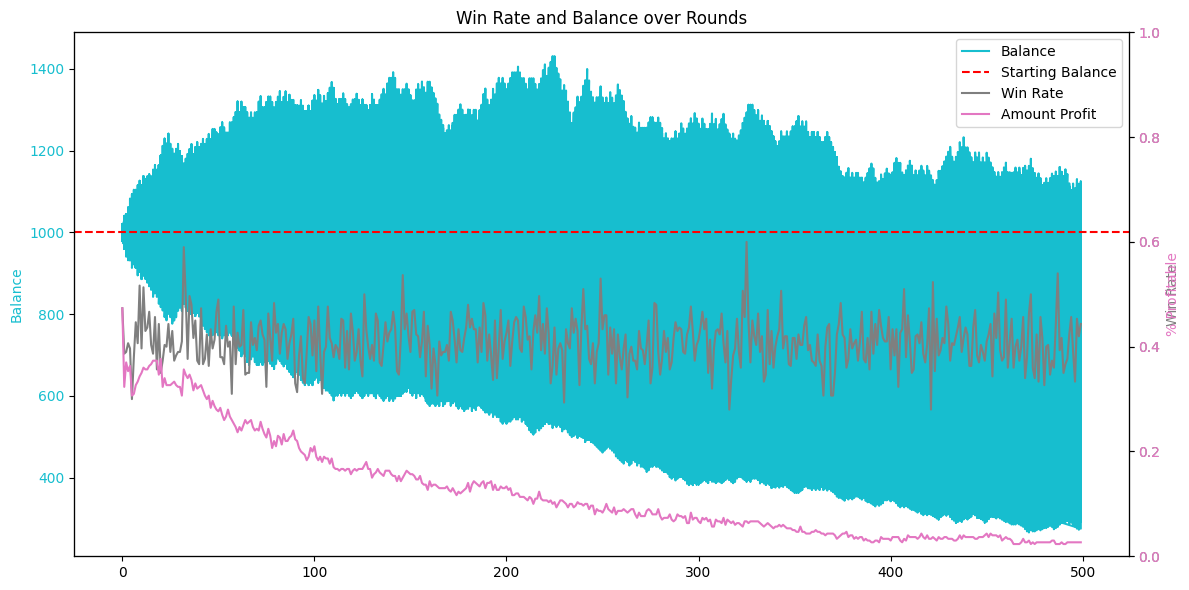

'\n40-45% win rate\nAs time goes on, even with 500 rounds, more likely to lose money than to win it\nPercent of unprofitable people increase a lot\n'

In [ ]:
"""Control group - Realistic rounds
six players with control strategy over 500 rounds
More realistic length
This is a more realistic length for a blackjack game, as it simulates a shorter session.

6 decks - most common at blackjack tables

"""
import random
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())  # or mcolors.BASE_COLORS, mcolors.CSS4_COLORS

results = pd.read_csv("Control_BaseStratOnly_500R6D.csv")

# print(results[results["round"] == 1])

win_rate = []

for i in range(500):
    round = results[results["round"] == i]
    win = round[round["win"]==1]
    # print(len(win))
    lose = round[round["loss"] ==1]
    amount_profit = round[round["balance"] > 1000]
    win_rate.append({"round":i, "wins": len(win), "losses": len(lose), "win_rate": len(win) / 300,
                     "amount_profit": len(amount_profit)/300})

win_rate_df = pd.DataFrame(win_rate)
print(win_rate_df)

win_rate_df["round"] = win_rate_df["round"].astype(int)

print("Win Rate:", win_rate_df["win_rate"].mean())

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax3 = ax1.twinx()

color = random.choice(colors)
ax2.set_xlabel('Round')
ax2.set_ylabel('Win Rate', color=color)
ax2.plot(win_rate_df["round"], win_rate_df["win_rate"], color=color, label="Win Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 1])

  # instantiate a second axes that shares the same x-axis
color2 = random.choice([c for c in colors if c != color])
ax1.set_ylabel('Balance', color=color2)  # we already handled the x-label with ax1
ax1.plot(results["round"], results["balance"], color=color2, label="Balance")
ax1.tick_params(axis='y', labelcolor=color2)
ax1.axhline(y=1000, color='red', linestyle='--', label='Starting Balance')

color3 = random.choice([c for c in colors if c != color and c != color2])
ax3.set_ylabel('% Profitable', color=color3)
ax3.plot(win_rate_df["round"], win_rate_df["amount_profit"], color=color3, label="Amount Profit")
ax3.tick_params(axis='y', labelcolor=color3)
ax3.set_ylim([0, 1])

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

plt.title('Win Rate and Balance over Rounds')
plt.tight_layout()
plt.show()

""" NOTES """
"""
40-45% win rate
As time goes on, even with 500 rounds, more likely to lose money than to win it
Percent of unprofitable people increase a lot
"""

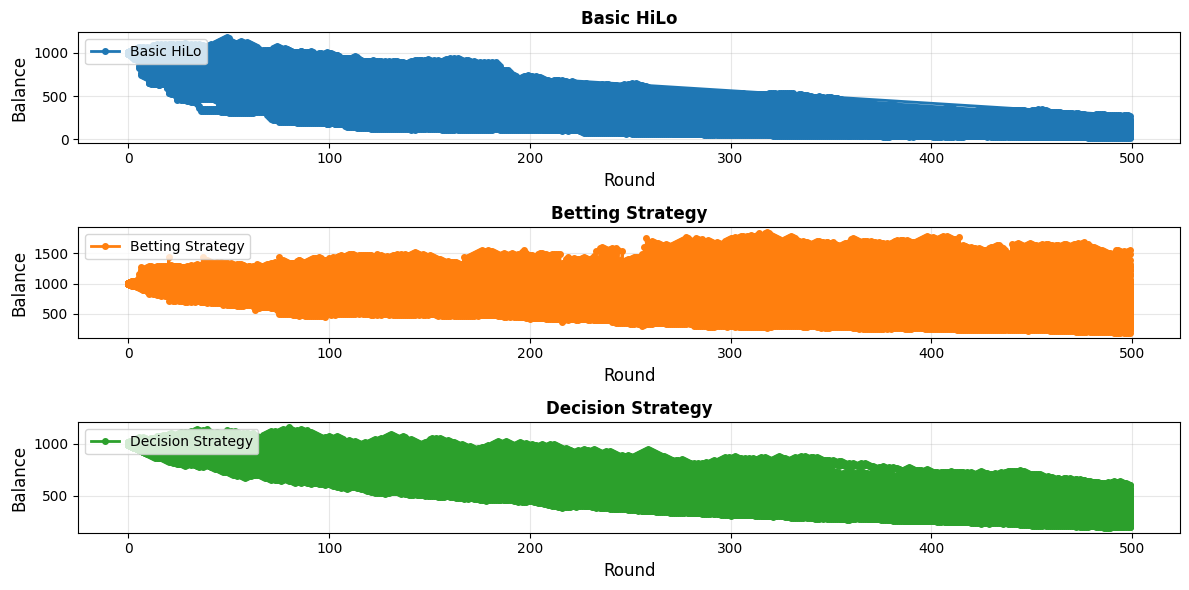

In [ ]:
""" 2 HiLo betting, 2 Hilo decision, 2 HiLo strategy

"""
import matplotlib.colors as mcolors
results = pd.read_csv("HiLo_Mixed_100G500R6D6P.csv")
colors = list(mcolors.TABLEAU_COLORS.values())  # or mcolors.BASE_COLORS, mcolors.CSS4_COLORS

def categorize_name(name):
    if 'HiLo 1_' in name or 'HiLo 2_' in name:
        return 'Basic HiLo'
    elif 'HiLo Bet1_' in name or 'HiLo Bet2_' in name:
        return 'Betting Strategy'
    elif 'HiLo Dec1_' in name or 'HiLo Dec2_' in name:
        return 'Decision Strategy'
    else:
        return 'Other'

results['group'] = results['name'].apply(categorize_name)

unique_names = results['group'].unique()
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 6))


for i, name in enumerate(unique_names):
    name_data = results[results['group'] == name]
    ax[i].plot(name_data['round'], name_data['balance'], 
             marker='o', linewidth=2, markersize=4, 
             label=name, color=colors[i])

    ax[i].set_title(name, fontsize=12, fontweight='bold')
    ax[i].set_xlabel('Round', fontsize=12)
    ax[i].set_ylabel('Balance', fontsize=12)
    ax[i].grid(True, alpha=0.3)
    ax[i].legend(loc='upper left')


plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()
"""
Using true count to place bets was the most effective
using true count to make decisions was the least effective and using both was worse

"""

   round  wins  losses  win_rate  percent_proftiable  cum_average_WR  \
0      0   199     317  0.663333            0.663333        0.663333   
1      1   233     301  0.776667            0.493333        0.720000   
2      2   256     289  0.853333            0.703333        0.764444   
3      3   230     310  0.766667            0.636667        0.765000   
4      4   246     295  0.820000            0.750000        0.776000   
5      5   239     298  0.796667            0.716667        0.779444   
6      6   279     263  0.930000            0.770000        0.800952   
7      7   235     305  0.783333            0.746667        0.798750   
8      8   245     295  0.816667            0.750000        0.800741   
9      9   261     282  0.870000            0.736667        0.807667   

   cum_average_profit  
0            0.663333  
1            0.578333  
2            0.620000  
3            0.624167  
4            0.649333  
5            0.660556  
6            0.676190  
7            0.

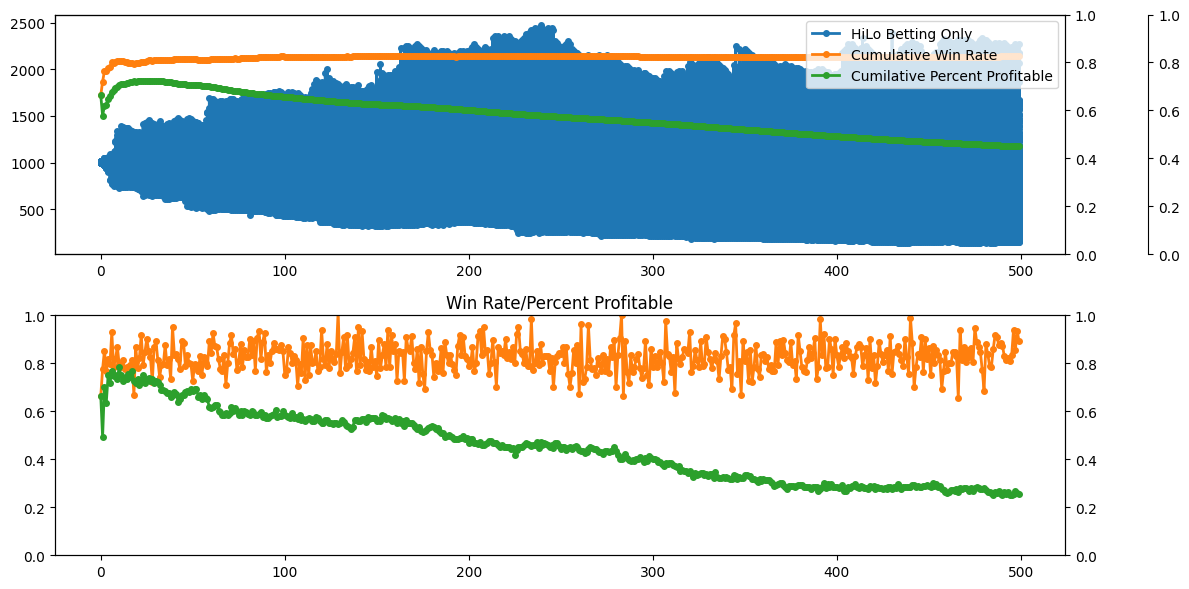

'\nUsing true count to place bets was the most effective\nusing true count to make decisions was the least effective and using both was worse\n\n'

In [ ]:
""" 6 HiLo betting

"""
from matplotlib import figure
import matplotlib.colors as mcolors
results = pd.read_csv("HiLo_BettingOnly_100G500R6D6P.csv")
colors = list(mcolors.TABLEAU_COLORS.values())  # or mcolors.BASE_COLORS, mcolors.CSS4_COLORS

win_rate = []
cum_sum = 0
cum_profit =0

for i in range(500):
    round = results[results["round"] == i]
    win = round[round["win"]==1]
    lose = round[round["loss"] ==1]
    amount_profit = round[round["balance"] > 1000]
    
    cum_profit += len(amount_profit) / 300
    avg_profit = cum_profit / (i+1)

    cum_sum += len(win) / 300
    avg = cum_sum / (i+1)
    win_rate.append(
        {"round":i, 
        "wins": len(win), 
        "losses": len(lose), 
        "win_rate": len(win) / 300,
        "percent_proftiable": len(amount_profit)/300, 
        "cum_average_WR": avg,
        "cum_average_profit": avg_profit
        })


win_rate_df = pd.DataFrame(win_rate)

print("Average Win Rate: ", win_rate_df["win_rate"].mean())
print("Average Percent Profitable: ", win_rate_df["percent_proftiable"].mean())

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

ax1 = axs[0]
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset ax3 to avoid overlapping with ax2
ax3.spines["right"].set_position(("outward", 60))

#actual results
ax1.plot(results['round'], results['balance'], 
         marker='o', linewidth=2, markersize=4, 
         label='HiLo Betting Only', color=colors[0])

#Cumulative Win Rate
ax2.plot(win_rate_df['round'], win_rate_df['cum_average_WR'], 
         marker='o', linewidth=2, markersize=4, 
         label='Cumulative Win Rate', color=colors[1],
         )
ax2.set_ylim(0, 1)

ax3.plot(win_rate_df['round'], win_rate_df["cum_average_profit"], 
         marker='o', linewidth=2, markersize=4, 
         label='Cumilative Percent Profitable', color=colors[2],
         )
ax3.set_ylim(0, 1)

#win rate
axs[1].plot(win_rate_df['round'], win_rate_df['win_rate'], 
         marker='o', linewidth=2, markersize=4, 
         label='Win Rate', color=colors[1],
         )
axs[1].set_ylim(0, 1)
axs[1].set_title("Win Rate/Percent Profitable")

axs_2 = axs[1].twinx()

#Percent Profitable
axs_2.plot(win_rate_df['round'], win_rate_df['percent_proftiable'], 
         marker='o', linewidth=2, markersize=4, 
         label='Percent Profitable', color=colors[2],
         )
axs_2.set_ylim(0, 1)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

fig.tight_layout()

# Show the plot
plt.show()
"""
Using true count to place bets was the most effective
using true count to make decisions was the least effective and using both was worse

"""